In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg
import glob
import json
import os
import torch
import torch.nn as nn
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, sampler
import pandas as pd
import copy


In [2]:
lbls = ["globules", "milia_like_cyst", "negative_network", "pigment_network", "streaks"]

In [3]:

def load_generator(base_path:str):
    model = os.path.join(base_path, "last_model_G.pth")
    return torch.load(model).to("cpu")

def execute_model(model, shape=100, sample_count=10):
    with torch.set_grad_enabled(False):
        z = Variable(torch.tensor(np.random.normal(0, 1, (sample_count, shape)), dtype=torch.float, device="cpu"))
        g_output = model(z)
    return g_output


In [4]:
model = load_generator("/Users/nduginets/Desktop/tmp")


tensor([[[[9.7857e-04, 9.9803e-01, 4.4633e-04, 3.0881e-05, 3.8808e-04,
           1.7564e-05, 2.7823e-05, 5.6945e-08, 4.1782e-09, 2.9428e-08,
           2.8844e-07, 1.1652e-05, 9.9326e-09, 5.5971e-05, 3.4134e-06,
           1.2125e-05],
          [9.9918e-01, 3.2895e-04, 2.3184e-05, 2.0179e-05, 1.8017e-06,
           3.5154e-08, 5.0618e-06, 8.8589e-05, 9.4738e-09, 3.4796e-04,
           1.1245e-07, 1.6936e-07, 3.5962e-08, 1.5784e-10, 3.4895e-10,
           1.0615e-07],
          [2.8368e-06, 1.9069e-04, 3.0397e-06, 1.1653e-05, 1.2773e-06,
           2.5585e-09, 9.9979e-01, 4.0833e-12, 1.8545e-09, 1.0769e-09,
           1.2229e-09, 2.7774e-10, 1.5633e-06, 1.0986e-08, 8.3133e-07,
           1.0896e-10],
          [9.9518e-01, 3.0537e-03, 7.3760e-05, 1.5028e-03, 1.6818e-04,
           1.9363e-05, 1.1086e-06, 9.3056e-07, 5.8320e-10, 6.6666e-10,
           7.3339e-10, 4.7739e-10, 9.0775e-10, 5.7725e-10, 5.6845e-10,
           4.4582e-10],
          [9.9587e-01, 3.4696e-03, 1.7551e-04, 3.448

In [10]:

def cnt_distribution(m, cnt=10):
    t = execute_model(m, sample_count=cnt)
    distributions = [[] for _ in range(0, 6)]
    for b in t:
        b = b[0]
        res = torch.argmax(b, dim=1)
        for idx in range(0, 6):
            distributions[idx].append(res[idx].item())
    return distributions

res = cnt_distribution(model, 1_000)

<Figure size 432x288 with 0 Axes>

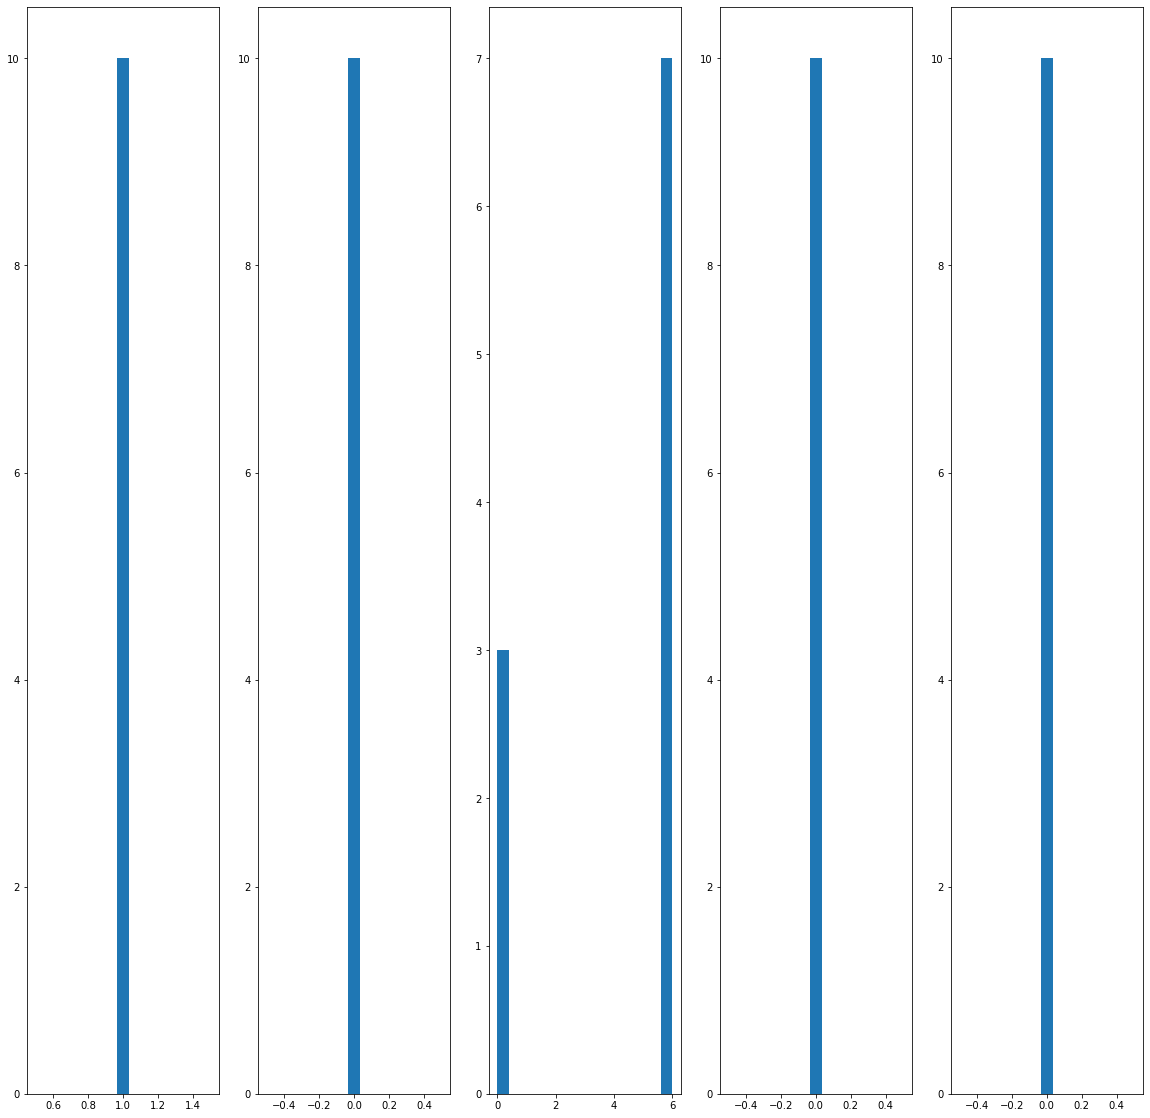

In [11]:
plt.clf()
fig, plots = plt.subplots(nrows=1, ncols=len(lbls), figsize = (20,20))
for idx, l in enumerate(lbls):
    plots[idx].hist(res[idx], bins=15)
    plots[idx].set_label(l)
plt.show()